# LEAD SCORING CASE STUDY 

## PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. although X Education gets a lot of leads, its lead conversion rate is very poor.  The typical lead conversion rate at X education is around 30%. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## GOAL

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## STEP 1: IMPORTING LIBRARIES AND DATA

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Reading the number of rows and columns
lead.shape

(9240, 37)

In [4]:
# reading numerical columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking data types and null values
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We are working with 7 numerical and 30 catg variables.
Looks like there are no null values. Lets move on to data cleaning.

## STEP 2: DATA CLEANING / EDA

In [6]:
#dropping 'Prospect' and 'Lead Number' as it's irrelevant to our models
lead = lead.drop(['Prospect ID', 'Lead Number'], 1)

In [7]:
#Many of the categorical variables have a level called 'Select' which is as good as a null value.
#Replacing 'Select' with NaN
lead = lead.replace('Select', np.nan)

In [8]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking null %
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
#Dropping all variables with missing values > 35%
lead=lead.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index', 'Asymmetrique Activity Index','City', 'Lead Profile', 'Lead Quality', 'Tags', 'How did you hear about X Education', 'Specialization'], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [11]:
#checking null %
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

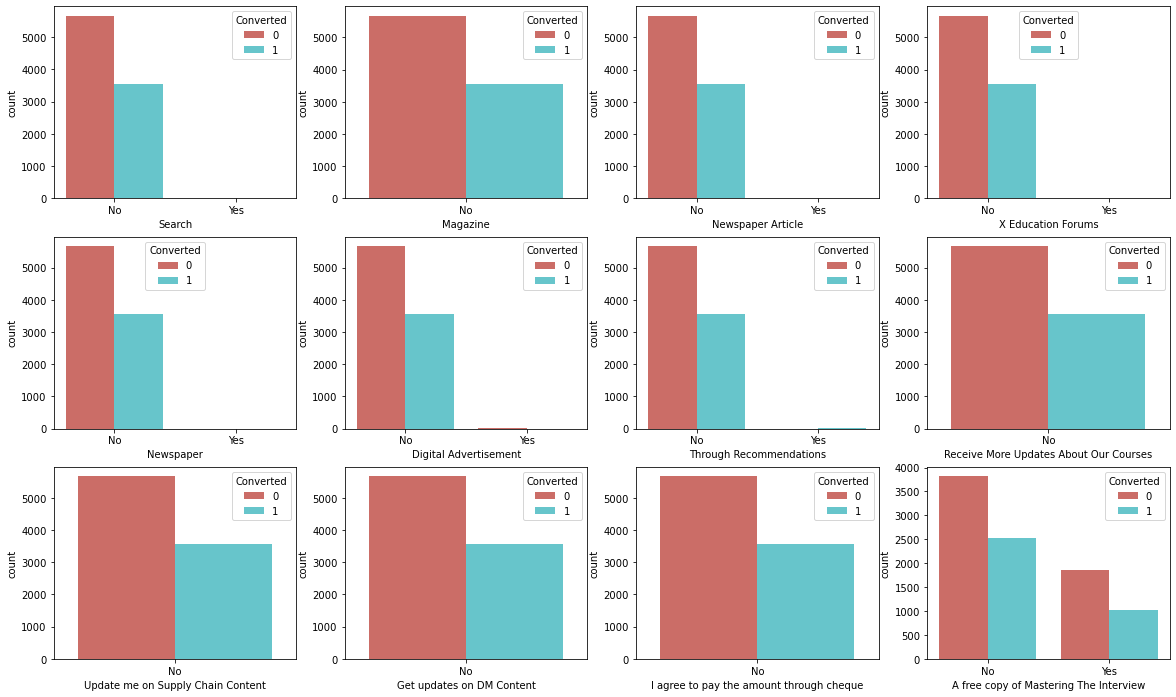

In [12]:
# Visualizing all catg variables 
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead, ax = axs[0,0],palette = 'hls')
sns.countplot(x = "Magazine", hue = "Converted", data = lead, ax = axs[0,1],palette = 'hls')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead, ax = axs[0,2],palette = 'hls')
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead, ax = axs[0,3],palette = 'hls')
sns.countplot(x = "Newspaper", hue = "Converted", data = lead, ax = axs[1,0],palette = 'hls')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead, ax = axs[1,1],palette = 'hls')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead, ax = axs[1,2],palette = 'hls')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead, ax = axs[1,3],palette = 'hls')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead, ax = axs[2,0],palette = 'hls')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead, ax = axs[2,1],palette = 'hls')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead, ax = axs[2,2],palette = 'hls')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead, ax = axs[2,3],palette = 'hls')
plt.show()

Except 'A free copy of Mastering The Interview', all other variables are skewed. Dropping them.

In [13]:
lead = lead.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'],1)

Next, we move onto the variables that had NaN values.

#### A) 'Country'

In [14]:
#checking value counts
lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

We could replace NaN with mode. However, since most of the data is skewed towards one variable i.e India, we can drop this as it provides no value to our model.

In [15]:
lead=lead.drop(['Country'], axis=1)

#### B) 'What is your current occupation' 

In [16]:
lead['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

We can replace NaN values with 'Not provided'. Can't go with mode here since the null value is very high.

In [17]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Not provided')

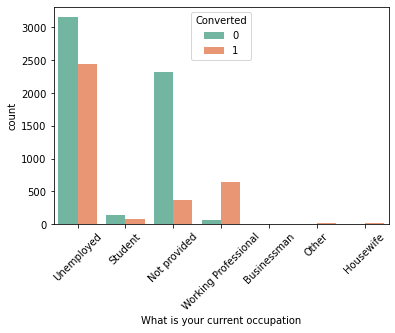

In [18]:
#visualizing the variable

s1=sns.countplot(x= 'What is your current occupation', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### C) 'What matters most to you in choosing a course'

In [19]:
#checking value counts
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Imputing mode here

In [20]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

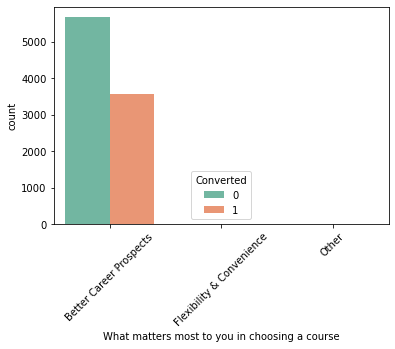

In [21]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = lead , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Since this variable has extremely low variance, dropping it.

In [22]:
lead=lead.drop(['What matters most to you in choosing a course'], axis=1)

#### D) 'Last Activity' and 'Last Notable Activity'

In [23]:
#checking value counts
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Imputing mode here

In [24]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Email Opened')

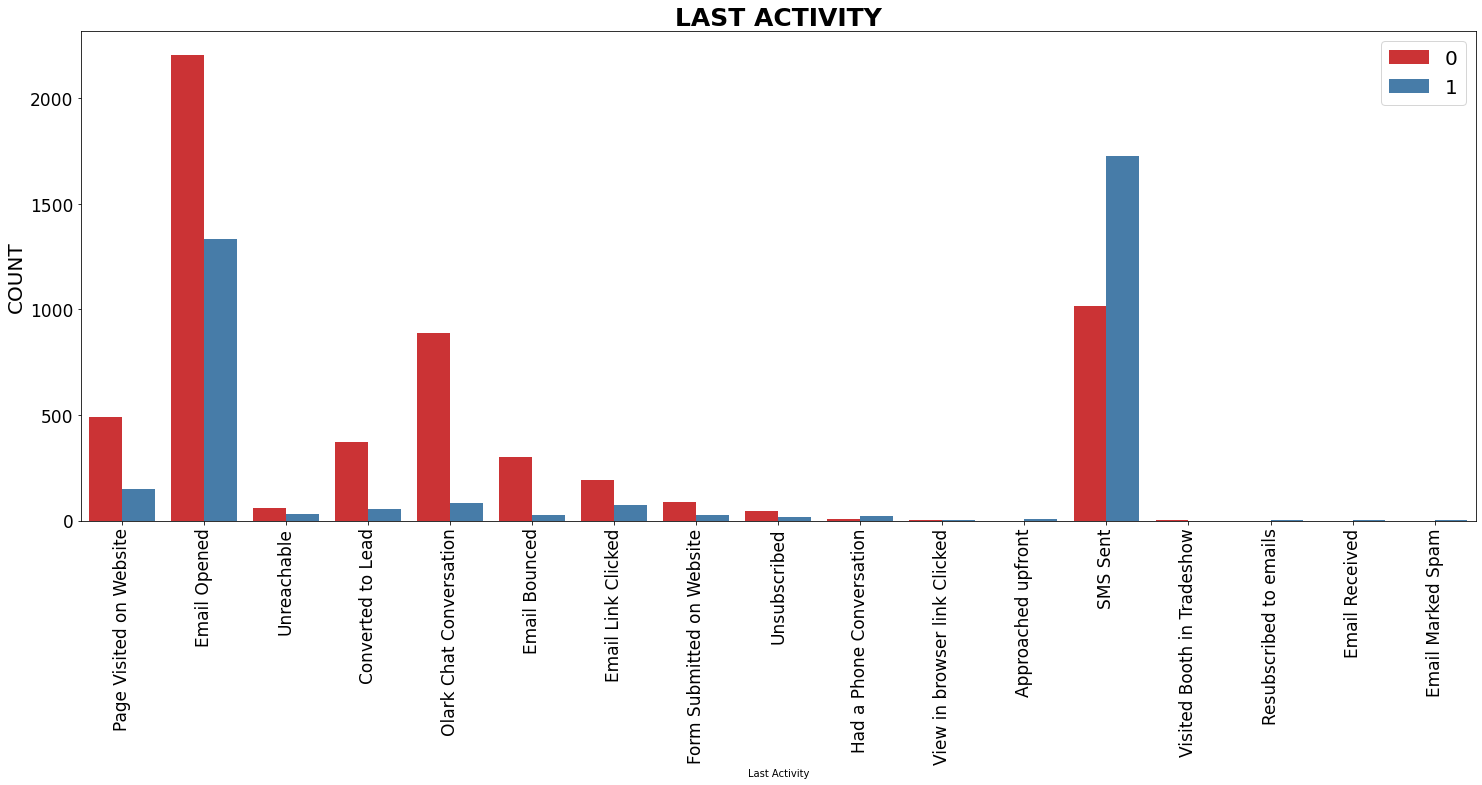

In [25]:
plt.figure(figsize=(25,9))
s1=sns.countplot(x= 'Last Activity', hue='Converted' , data = lead , palette = 'Set1')
plt.title('LAST ACTIVITY',fontsize=25, fontweight="bold" )
plt.ylabel("COUNT",fontsize= 20)
plt.xticks(rotation=90, fontsize=17)
plt.yticks(rotation=360, fontsize=17)
plt.legend( loc = 'upper right', fontsize=20) 
plt.show()

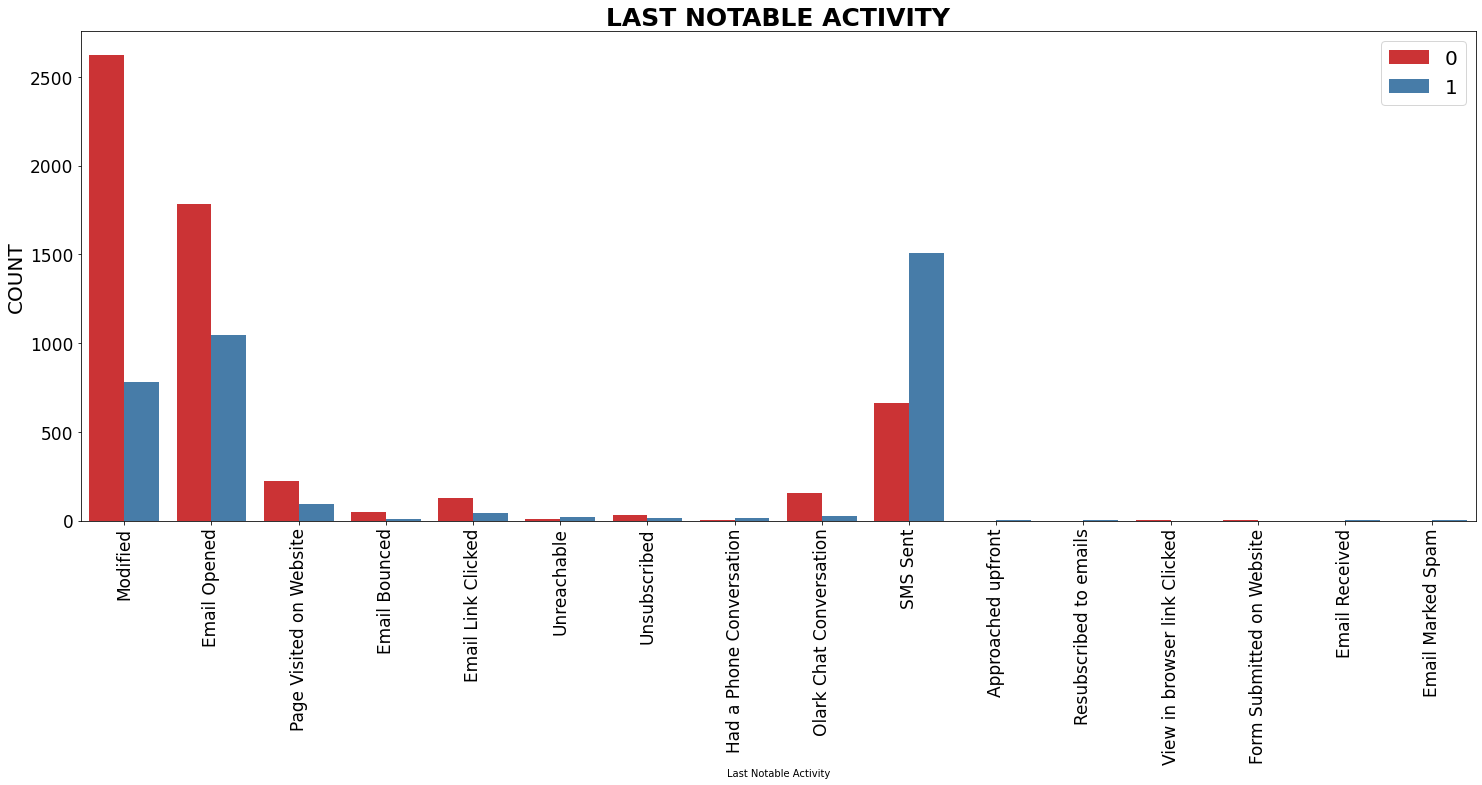

In [26]:
plt.figure(figsize=(25,9))
s1=sns.countplot(x= 'Last Notable Activity', hue='Converted' , data = lead , palette = 'Set1')
plt.title('LAST NOTABLE ACTIVITY',fontsize=25, fontweight="bold" )
plt.ylabel("COUNT",fontsize= 20)
plt.xticks(rotation=90, fontsize=17)
plt.yticks(rotation=360, fontsize=17)
plt.legend( loc = 'upper right', fontsize=20) 
plt.show()

With both 'Last Activity' and 'Last Notable Activity', conversion rate isn't good. Only SMS factor seems promising. Since it doesn't add much value to our case study, dropping these columns

In [27]:
#Low variance. We can drop this column.
lead=lead.drop(['Last Activity', 'Last Notable Activity'], axis=1)

#### E) 'Lead Source'

In [28]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Imputing mode here

In [29]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Google')

# Merging the label 'google' with lable 'Google'
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')

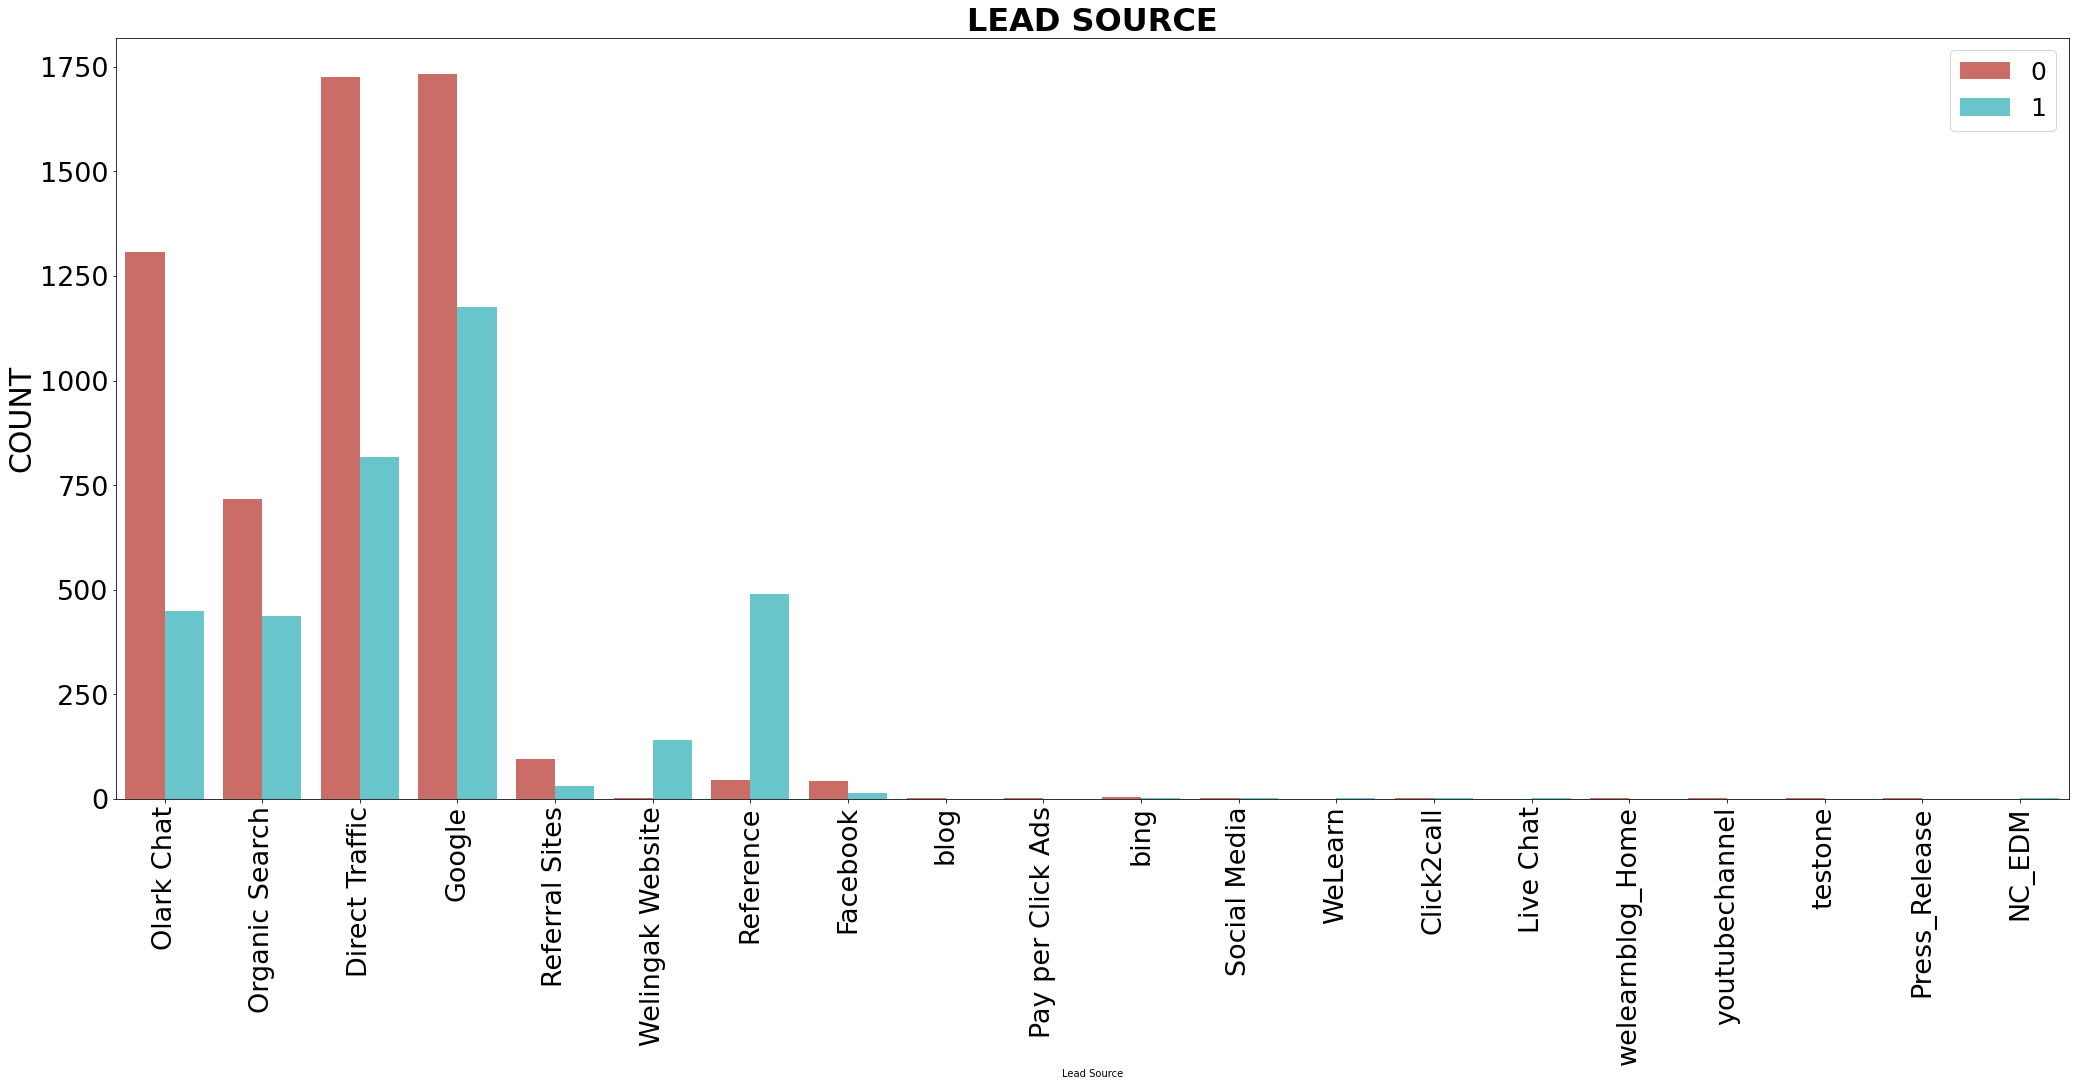

In [30]:
#let's visualize the variable
plt.figure(figsize=(35,14))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data = lead , palette = 'hls')
plt.title('LEAD SOURCE',fontsize=32, fontweight="bold" )
plt.ylabel("COUNT",fontsize= 30)
plt.xticks(rotation=90, fontsize=27)
plt.yticks(rotation=360, fontsize=27)
plt.legend( loc = 'upper right', fontsize=25) 
plt.show()

In [31]:
#merging low frequency values to 'Others'

lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

#### F) 'TotalVisits' and 'Page Views Per Visit'

In [32]:
#Since the Numeric variables have less than 1% null values, we'll impute them with median

lead.TotalVisits.fillna(lead.TotalVisits.median(), inplace=True)
lead.TotalVisits = lead.TotalVisits.astype('int') #changed float datatype to int

In [33]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)

#### G) 'Do Not Email ' and 'Do Not Call'

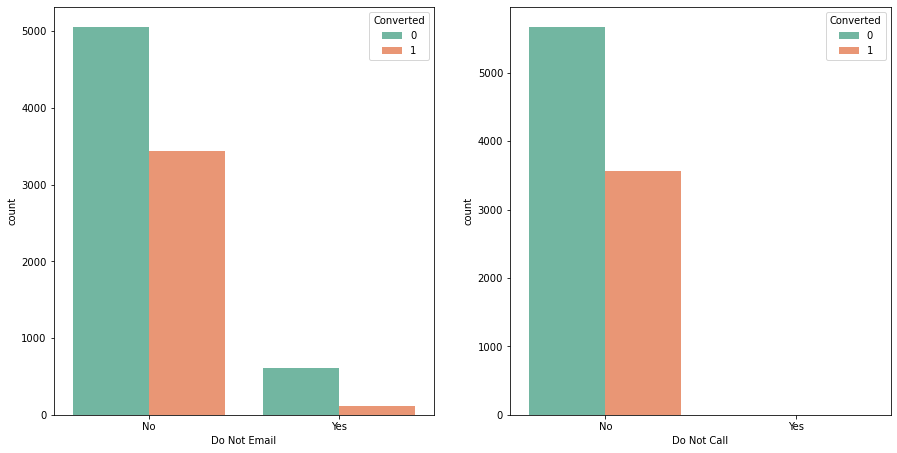

In [34]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead, ax = axs[1],palette = 'Set2')
plt.show()

Do not call data is skewed. Dropping it

In [35]:
lead=lead.drop(['Do Not Call'], axis=1)

In [36]:
#checking null %
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [37]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0,0,0.0,Unemployed,No
1,API,Organic Search,No,0,5,674,2.5,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Unemployed,No
4,Landing Page Submission,Google,No,1,2,1428,1.0,Unemployed,No


### The data has now been cleaned

### Visualizing the Numerical data

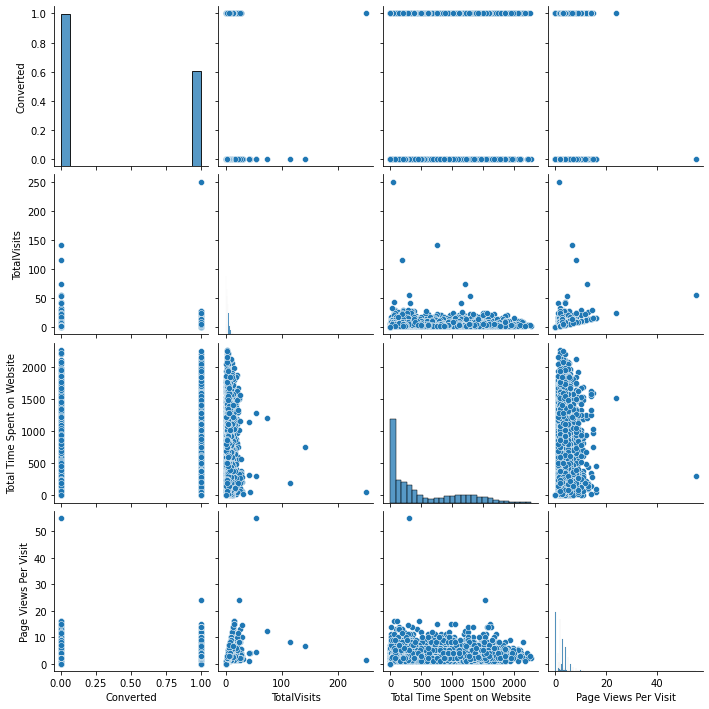

In [38]:
sns.pairplot(lead)
plt.show()

Skewed data. No inference can be drawn.

### Current Conversion rate

In [39]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

Conversion rate is only 38% right now

## STEP 3: PREPARING THE DATA FOR MODELLING

### BINARY CONVERSION (YES:1, NO:0)

In [40]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [41]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0,0.0,Unemployed,0
1,API,Organic Search,0,0,5,674,2.5,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Unemployed,0
4,Landing Page Submission,Google,0,1,2,1428,1.0,Unemployed,0


In [42]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   int32  
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 613.7+ KB


### Dummy Variables

In [43]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'What is your current occupation', ]], drop_first = True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

# Dropping the columns for which dummies have been created
lead.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], axis = 1, inplace = True)

lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   int32  
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

## STEP 4: SPLITTING THE DATA

## Train-Test split

In [45]:
# Putting feature variable to X
X=lead.drop('Converted', axis=1)

# Putting response variable to y
y = lead['Converted']

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## STEP 5: FEATURE SCALING

### STANDARD SCALER

In [47]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0.100767,0.005716,-0.470569,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8105,0,0.290067,1.365219,1.226321,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Let's check the correlation matrix

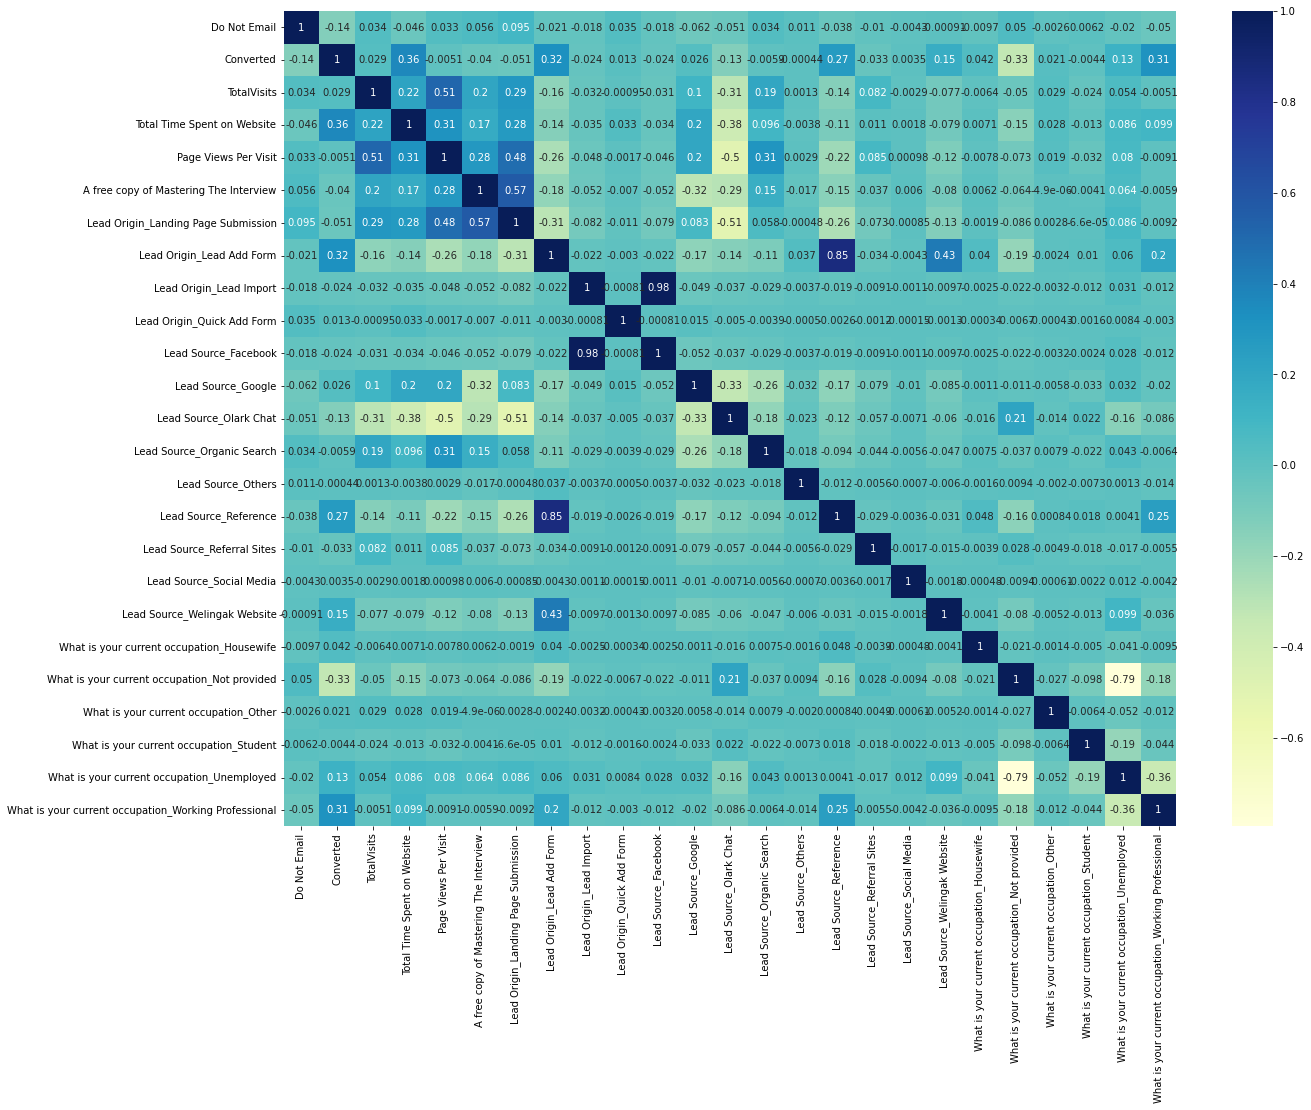

In [49]:
plt.figure(figsize = (20,15))       
sns.heatmap(lead.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [50]:
X_test.drop(['Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 
                     'What is your current occupation_Not provided', 'Lead Source_Olark Chat'], axis = 1, inplace = True)

X_train.drop(['Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 
                     'What is your current occupation_Not provided', 'Lead Source_Olark Chat' ], axis = 1, inplace = True)

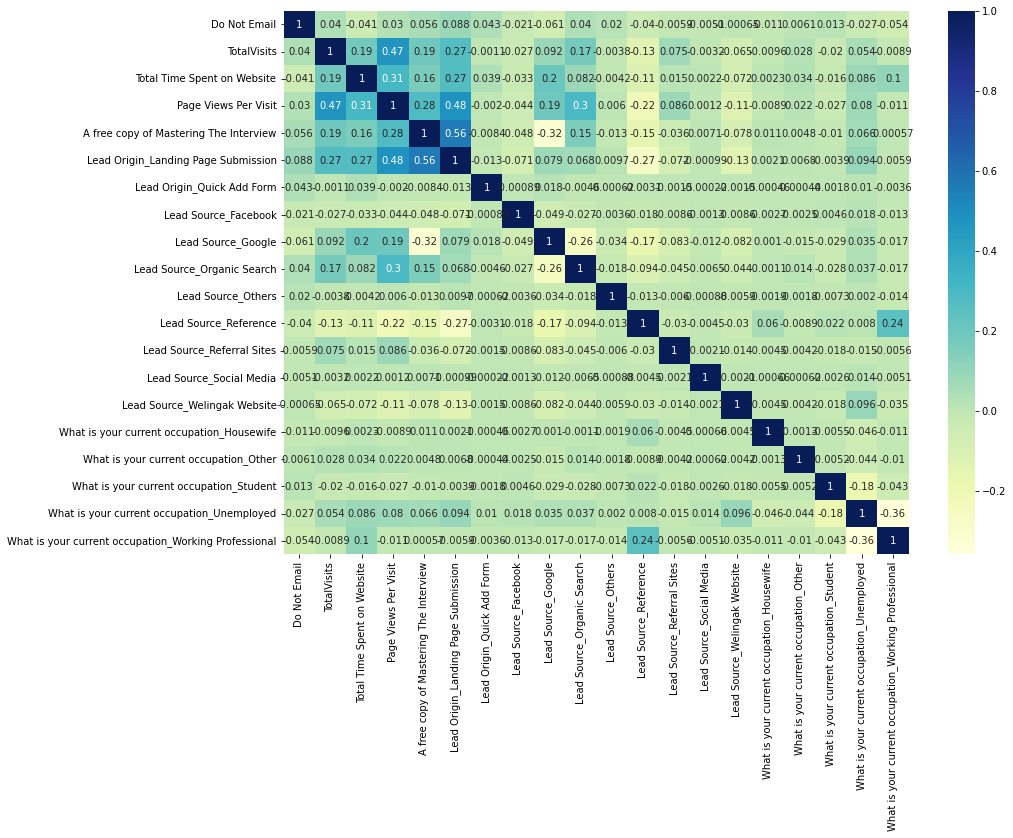

In [51]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## STEP 6: MODEL BUILDING

In [52]:
# importing necessary library
import statsmodels.api as sm

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Quick Add Form', False, 2),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 2),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [56]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'What is your current occupation_Other'],
      dtype='object')

### MODEL 1

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2972.7
Date:                Sun, 12 Mar 2023   Deviance:                       5945.4
Time:                        17:05:25   Pearson chi2:                 7.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7225      0.071    -24.206      0.000      -1.862      -1.583
Do Not Email                                            -1.2726      0.152     -8.363      0.000      -1.571      -0.974
Total Time Spent on Website                              0.9223      0.033     28.014      0.000       0.858       0.987
Lead Source_Facebook                                    -0.5982      0.501     -1.193      0.233      -1.581       0.384
Lead Source_Others                                       1.0465      0.542      1.932      0.053      -0.015       2.108
Lead Source_Reference                                    3.1813      0.195     16.274      0.000       2.798       3.564
Lead Source_Welingak Website                             5.2330      0.721      7.255      0.000       3.819       6.647
What is your current occupation_Housewife               23.3201    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
What is your current occupation_Student                  1.0938      0.220      4.979      0.000       0.663       1.524
What is your current occupation_Unemployed               1.1578      0.080     14.452      0.000       1.001       1.315
What is your current occupation_Working Professional     3.6734      0.190     19.333      0.000       3.301       4.046
========================================================================================================================
"""

In [59]:
# Dropping What is your current occupation_Housewife

col = col.drop('What is your current occupation_Housewife',1)

### MODEL 2

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.7
Date:                Sun, 12 Mar 2023   Deviance:                       5963.3
Time:                        17:05:25   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3346
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6988      0.070    -24.126      0.000      -1.837      -1.561
Do Not Email                                            -1.2787      0.152     -8.401      0.000      -1.577      -0.980
Total Time Spent on Website                              0.9229      0.033     28.069      0.000       0.858       0.987
Lead Source_Facebook                                    -0.6000      0.501     -1.197      0.231      -1.582       0.382
Lead Source_Others                                       1.0400      0.541      1.921      0.055      -0.021       2.101
Lead Source_Reference                                    3.2236      0.195     16.502      0.000       2.841       3.606
Lead Source_Welingak Website                             5.2363      0.721      7.259      0.000       3.822       6.650
What is your current occupation_Student                  1.0683      0.220      4.864      0.000       0.638       1.499
What is your current occupation_Unemployed               1.1329      0.079     14.267      0.000       0.977       1.289
What is your current occupation_Working Professional     3.6481      0.190     19.226      0.000       3.276       4.020
========================================================================================================================
"""

In [61]:
# Dropping Lead Source_Facebook

col = col.drop('Lead Source_Facebook',1)

### MODEL 3

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.4
Date:                Sun, 12 Mar 2023   Deviance:                       5964.9
Time:                        17:05:25   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3345
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7011      0.070    -24.159      0.000      -1.839      -1.563
Do Not Email                                            -1.2760      0.152     -8.382      0.000      -1.574      -0.978
Total Time Spent on Website                              0.9243      0.033     28.121      0.000       0.860       0.989
Lead Source_Others                                       1.0429      0.541      1.927      0.054      -0.018       2.104
Lead Source_Reference                                    3.2280      0.195     16.528      0.000       2.845       3.611
Lead Source_Welingak Website                             5.2403      0.721      7.265      0.000       3.827       6.654
What is your current occupation_Student                  1.0654      0.220      4.852      0.000       0.635       1.496
What is your current occupation_Unemployed               1.1316      0.079     14.250      0.000       0.976       1.287
What is your current occupation_Working Professional     3.6461      0.190     19.226      0.000       3.274       4.018
========================================================================================================================
"""

In [63]:
# Dropping Lead Source_Others

col = col.drop('Lead Source_Others',1)

### MODEL 4

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2984.2
Date:                Sun, 12 Mar 2023   Deviance:                       5968.3
Time:                        17:05:25   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3341
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6961      0.070    -24.128      0.000      -1.834      -1.558
Do Not Email                                            -1.2694      0.152     -8.343      0.000      -1.568      -0.971
Total Time Spent on Website                              0.9232      0.033     28.103      0.000       0.859       0.988
Lead Source_Reference                                    3.2239      0.195     16.511      0.000       2.841       3.607
Lead Source_Welingak Website                             5.2348      0.721      7.258      0.000       3.821       6.648
What is your current occupation_Student                  1.0602      0.219      4.831      0.000       0.630       1.490
What is your current occupation_Unemployed               1.1297      0.079     14.235      0.000       0.974       1.285
What is your current occupation_Working Professional     3.6410      0.190     19.205      0.000       3.269       4.013
========================================================================================================================
"""

### VIF Check

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Reference,1.18
5,What is your current occupation_Unemployed,1.13
6,What is your current occupation_Working Profes...,1.12
0,Do Not Email,1.05
1,Total Time Spent on Website,1.05
3,Lead Source_Welingak Website,1.03
4,What is your current occupation_Student,1.01


In [66]:
## VIF look's great. We can continue predictions on this model.

## STEP 7: PREDICTING TRAIN MODEL

In [67]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.200393
6795    0.363280
3516    0.230627
8105    0.666854
3934    0.200393
4844    0.975029
3297    0.224392
8071    0.992806
987     0.242916
7423    0.778427
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20039271, 0.36328006, 0.23062657, 0.66685374, 0.20039271,
       0.97502864, 0.22439216, 0.99280649, 0.24291618, 0.77842712])

In [69]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.200393,1871
1,0,0.363280,6795
2,0,0.230627,3516
3,0,0.666854,8105
4,0,0.200393,3934


In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.200393,1871,0
1,0,0.363280,6795,0
2,0,0.230627,3516,0
3,0,0.666854,8105,1
4,0,0.200393,3934,0


### METRICS -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [71]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3587  415]
 [ 869 1597]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8014842300556586


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6476074614760746

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.8963018490754623

In [76]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10369815092453773


In [77]:
# positive predictive value 
print (TP / float(TP+FP))

0.7937375745526839


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8049820466786356


### ROC CURVE

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

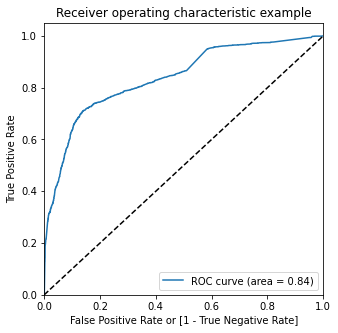

In [81]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since ROC value is close to 1, our model is good.

### FINDING OPTIMAL CUT OFF

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200393,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.363280,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.230627,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.666854,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.200393,3934,0,1,1,1,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.546382  0.966748  0.287356
0.2   0.2  0.619821  0.948094  0.417541
0.3   0.3  0.764533  0.763179  0.765367
0.4   0.4  0.803185  0.702758  0.865067
0.5   0.5  0.801484  0.647607  0.896302
0.6   0.6  0.784632  0.562855  0.921289
0.7   0.7  0.758349  0.454582  0.945527
0.8   0.8  0.731138  0.332928  0.976512
0.9   0.9  0.694496  0.206407  0.995252


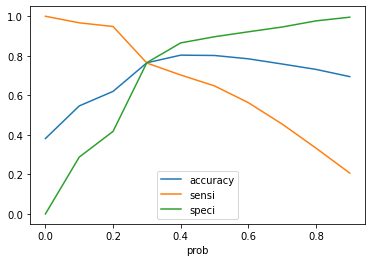

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

### Final prediction on Train set

In [85]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.200393,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.363280,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.230627,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.666854,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.200393,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [86]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.200393,1871,0,20
1,0,0.363280,6795,1,36
2,0,0.230627,3516,0,23
3,0,0.666854,8105,1,67
4,0,0.200393,3934,0,20


In [87]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1882
0     584
Name: final_Predicted, dtype: int64

In [88]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

Conversion rate is 82%, marking it as a good model

## STEP 8: PREDICTION ON TEST SET

In [89]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,-0.298654,8,0.933036,2.669778,-0.67689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,-0.298654,0,-0.900812,-1.130671,-0.67689,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7766,-0.298654,5,-0.793792,1.244609,-0.67689,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9199,-0.298654,0,-0.900812,-1.130671,-0.67689,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,-0.298654,0,-0.900812,-1.130671,-0.67689,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [90]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,-0.298654,0.933036,0,0,0,0,0
2376,-0.298654,-0.900812,1,0,0,1,0
7766,-0.298654,-0.793792,0,0,0,0,1
9199,-0.298654,-0.900812,0,0,0,1,0
4359,-0.298654,-0.900812,1,0,0,1,0


In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
X_test_sm.shape

(2772, 8)

In [93]:
y_test_pred = res.predict(X_test_sm)

In [94]:
y_test_pred[:10]

4269    0.388032
2376    0.900689
7766    0.830769
9199    0.265226
4359    0.900689
9186    0.501478
1631    0.663169
8963    0.361197
8007    0.171848
5324    0.320596
dtype: float64

In [95]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [96]:
# Let's see the head
y_pred_1.head()

,0
4269,0.388032
2376,0.900689
7766,0.830769
9199,0.265226
4359,0.900689


In [97]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [98]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [99]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.388032
1,1,2376,0.900689
2,1,7766,0.830769
3,0,9199,0.265226
4,1,4359,0.900689


In [102]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.388032
1,1,2376,0.900689
2,1,7766,0.830769
3,0,9199,0.265226
4,1,4359,0.900689


## STEP 9: ASSIGNING LEAD SCORE

In [103]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [104]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.388032,39
1,2376,1,0.900689,90
2,7766,1,0.830769,83
3,9199,0,0.265226,27
4,4359,1,0.900689,90


In [105]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [106]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.388032,39,1
1,2376,1,0.900689,90,1
2,7766,1,0.830769,83,1
3,9199,0,0.265226,27,0
4,4359,1,0.900689,90,1


In [107]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    894
0    201
Name: final_Predicted, dtype: int64

In [108]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### Our final prediction on the test data set is 83%.

### Checking Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on test set

In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6911976911976911

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1022,  655],
       [ 201,  894]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8164383561643835

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.6094215861657722

## STEP 10: PRECISION AND RECALL

In [114]:
metrics.precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.5771465461588121

In [115]:
metrics.recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8164383561643835

### Summary:

After running the model on the Test Data these are the figures we obtain:

- Accuracy : 69.11%
- Sensitivity :81.64%
- Specificity : 60.94%
- Precision  : 57.71%
- Recall  :81.64%

#### Our final prediction on the test data set is 83%! Meeting the expecation of the CEO.

### Conclusion:

- Accuracy, Sensitivity and Specificity values of test set are approximately closer to the respective values calculated using trained set.

- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%

This model seems promising.

Important features which contribute towards the probability of a lead getting converted are :

- What is your current occupation_Working Professional
- Total Time Spent on Website
- Lead Source_Reference
- Lead Source_Welingak Website